# Overview: `x4c` as an Xarray extension


`x4c` provides core features in the form of an Xarray extension, with enhancements for CESM output analysis and visualization.
It works seamlessly with `xarray.Dataset` and `xarray.DataArray`.
In this tutorial, we show some simple examples to give a quick glance of the major features, including:
- Annualization
- Geospatial Averaging
- Regridding
- Publication-ready Visualization

More detailed explainations of each feature can be found in later sections.

<div style="border-left: 5px solid #787878ff; padding: 0.5em; background: #ebebebff;">

**Example Datasets:**
Zhu, F. & Zhu, J. Long simulations of the Miocene Climatic Optimum, DOI: 10.5065/3QFN-GN70 (2025). https://rda.ucar.edu/datasets/d010026/.
</div>

In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
os.chdir('/glade/u/home/fengzhu/Github/x4c/docsrc/notebooks')
import x4c
print(x4c.__version__)

2025.6.22


## Loading a netCDF file as an `xarray.Dataset`

The `x4c.load_dataset()` function is an enhanced version of `xarray.load_dataset()` for CESM output.
The users may specify the component (`comp`) and grid (`grid`) information while loading the file.

In [ ]:
dirpath = '/glade/campaign/cesm/community/palwg/MCO_LongSims/b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO2.005'
fname = 'b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO2.005.cam.h0.TS.895101-900012.nc'
ds = x4c.load_dataset(
    os.path.join(dirpath, 'atm/proc/tseries/month_1', fname),
    comp='atm',
    grid='ne16np4',
)
ds

<xarray.Dataset> Size: 34MB
Dimensions:       (lev: 30, ilev: 31, ncol: 13826, time: 600, nbnd: 2)
Coordinates:
  * lev           (lev) float64 240B 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 248B 2.255 5.032 10.16 ... 967.5 985.1 1e+03
  * time          (time) object 5kB 8951-02-01 00:00:00 ... 9001-01-01 00:00:00
Dimensions without coordinates: ncol, nbnd
Data variables: (12/31)
    hyam          (lev) float64 240B 0.003643 0.007595 0.01436 ... 0.001989 0.0
    hybm          (lev) float64 240B 0.0 0.0 0.0 0.0 ... 0.9512 0.9743 0.9926
    P0            float64 8B 1e+05
    hyai          (ilev) float64 248B 0.002255 0.005032 0.01016 ... 0.0 0.0
    hybi          (ilev) float64 248B 0.0 0.0 0.0 0.0 ... 0.9636 0.9851 1.0
    lat           (ncol) float64 111kB -35.26 -35.98 -37.07 ... 37.91 36.74
    ...            ...
    n2ovmr        (time) float64 5kB 2.757e-07 2.757e-07 ... 2.757e-07 2.757e-07
    f11vmr        (time) float64 5kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    f12vmr        (time) float64 5kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    sol_tsi       (time) float64 5kB -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
    nsteph        (time) int32 2kB 156805488 156806832 ... 157678512 157680000
    TS            (time, ncol) float32 33MB 303.9 303.3 302.5 ... 292.6 293.3
Attributes: (12/18)
    np:               4
    ne:               16
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO...
    title:            UNSET
    ...               ...
    path:             /glade/campaign/cesm/community/palwg/MCO_LongSims/b.e13...
    comp:             atm
    grid:             ne16np4
    gw:               <xarray.DataArray 'area' (ncol: 13826)> Size: 111kB\nar...
    lat:              <xarray.DataArray 'lat' (ncol: 13826)> Size: 111kB\narr...
    lon:              <xarray.DataArray 'lon' (ncol: 13826)> Size: 111kB\narr...

In [10]:
print(ds.attrs['comp'])
print(ds.attrs['grid'])
print(ds.attrs['path'])

atm
ne16np4
/glade/campaign/cesm/community/palwg/MCO_LongSims/b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO2.005/atm/proc/tseries/month_1/b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO2.005.cam.h0.TS.895101-900012.nc


The loaded dataset has add-on attributes such as `comp` and `grid` that are useful for later analysis and visualization. The add-on attribute `path` is good for file tracking.

Note that the time axis is offset by one month in the raw iCESM1 output, and `x4c.load_dataset()` provides the option `adjust_month=True` to fix this issue.
This won't be an issue for CESM2 & 3 outputs.

In [6]:
dirpath = '/glade/campaign/cesm/community/palwg/MCO_LongSims/b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO2.005'
fname = 'b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO2.005.cam.h0.TS.895101-900012.nc'
ds = x4c.load_dataset(
    os.path.join(dirpath, 'atm/proc/tseries/month_1', fname),
    comp='atm',
    grid='ne16np4',
    adjust_month=True,
)
ds

<xarray.Dataset> Size: 34MB
Dimensions:       (lev: 30, ilev: 31, ncol: 13826, time: 600, nbnd: 2)
Coordinates:
  * lev           (lev) float64 240B 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 248B 2.255 5.032 10.16 ... 967.5 985.1 1e+03
  * time          (time) object 5kB 8951-01-31 00:00:00 ... 9000-12-31 00:00:00
Dimensions without coordinates: ncol, nbnd
Data variables: (12/31)
    hyam          (lev) float64 240B 0.003643 0.007595 0.01436 ... 0.001989 0.0
    hybm          (lev) float64 240B 0.0 0.0 0.0 0.0 ... 0.9512 0.9743 0.9926
    P0            float64 8B 1e+05
    hyai          (ilev) float64 248B 0.002255 0.005032 0.01016 ... 0.0 0.0
    hybi          (ilev) float64 248B 0.0 0.0 0.0 0.0 ... 0.9636 0.9851 1.0
    lat           (ncol) float64 111kB -35.26 -35.98 -37.07 ... 37.91 36.74
    ...            ...
    n2ovmr        (time) float64 5kB 2.757e-07 2.757e-07 ... 2.757e-07 2.757e-07
    f11vmr        (time) float64 5kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    f12vmr        (time) float64 5kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    sol_tsi       (time) float64 5kB -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
    nsteph        (time) int32 2kB 156805488 156806832 ... 157678512 157680000
    TS            (time, ncol) float32 33MB 303.9 303.3 302.5 ... 292.6 293.3
Attributes: (12/18)
    np:               4
    ne:               16
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO...
    title:            UNSET
    ...               ...
    path:             /glade/campaign/cesm/community/palwg/MCO_LongSims/b.e13...
    comp:             atm
    grid:             ne16np4
    gw:               <xarray.DataArray 'area' (ncol: 13826)> Size: 111kB\nar...
    lat:              <xarray.DataArray 'lat' (ncol: 13826)> Size: 111kB\narr...
    lon:              <xarray.DataArray 'lon' (ncol: 13826)> Size: 111kB\narr...

To inherit the add-on attributes when referencing a data variable, we should use the syntax `ds.x[vn]`, where `vn` refers to the variable name.

In [14]:
da = ds.x['TS']
da

<xarray.DataArray 'TS' (time: 600, ncol: 13826)> Size: 33MB
array([[303.87384, 303.30386, 302.49002, ..., 293.76035, 291.0333 ,
        291.91165],
       [304.57132, 304.219  , 303.71158, ..., 292.73807, 290.36758,
        291.43896],
       [304.5752 , 304.2225 , 303.69778, ..., 292.7631 , 291.61636,
        292.54977],
       ...,
       [298.30557, 297.24545, 295.97394, ..., 302.33307, 301.01004,
        301.58942],
       [300.32935, 299.35425, 298.1272 , ..., 298.4472 , 295.93607,
        296.67627],
       [302.33698, 301.58383, 300.57407, ..., 294.71838, 292.59775,
        293.28656]], shape=(600, 13826), dtype=float32)
Coordinates:
  * time     (time) object 5kB 8951-01-31 00:00:00 ... 9000-12-31 00:00:00
    lat      (ncol) float64 111kB -35.26 -35.98 -37.07 ... 37.91 37.91 36.74
    lon      (ncol) float64 111kB 315.0 316.6 319.1 320.6 ... 132.5 137.5 135.0
Dimensions without coordinates: ncol
Attributes:
    units:         K
    long_name:     Surface temperature (radiative)
    cell_methods:  time: mean
    path:          /glade/campaign/cesm/community/palwg/MCO_LongSims/b.e13.B1...
    gw:            <xarray.DataArray 'area' (ncol: 13826)> Size: 111kB\narray...
    lat:           <xarray.DataArray 'lat' (ncol: 13826)> Size: 111kB\narray(...
    lon:           <xarray.DataArray 'lon' (ncol: 13826)> Size: 111kB\narray(...
    comp:          atm
    grid:          ne16np4

## Annualization

`x4c` provides a handy function `annualize()` for annualization of a `xarray.Dataset` or `xarray.DataArray`.

<div style="border-left: 5px solid #2196F3; padding: 0.5em; background: #E3F2FD;">

**Note:** All the Xarray extension features provided by `x4c` should be called via a `.x` syntax. See examples below.
</div>

In [11]:
ds_ann = ds.x.annualize()
ds_ann

<xarray.Dataset> Size: 19MB
Dimensions:  (time: 50, lev: 30, ilev: 31, ncol: 13826)
Coordinates:
  * lev      (lev) float64 240B 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev     (ilev) float64 248B 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time     (time) object 400B 8951-12-31 00:00:00 ... 9000-12-31 00:00:00
Dimensions without coordinates: ncol
Data variables: (12/28)
    hyam     (time, lev) float64 12kB 0.003643 0.007595 0.01436 ... 0.001989 0.0
    hybm     (time, lev) float64 12kB 0.0 0.0 0.0 0.0 ... 0.9512 0.9743 0.9926
    P0       (time) float64 400B 1e+05 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
    hyai     (time, ilev) float64 12kB 0.002255 0.005032 0.01016 ... 0.0 0.0
    hybi     (time, ilev) float64 12kB 0.0 0.0 0.0 0.0 ... 0.9636 0.9851 1.0
    lat      (time, ncol) float64 6MB -35.26 -35.98 -37.07 ... 37.91 37.91 36.74
    ...       ...
    n2ovmr   (time) float64 400B 2.757e-07 2.757e-07 ... 2.757e-07 2.757e-07
    f11vmr   (time) float64 400B 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    f12vmr   (time) float64 400B 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    sol_tsi  (time) float64 400B -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
    nsteph   (time) float64 400B 1.568e+08 1.568e+08 ... 1.577e+08 1.577e+08
    TS       (time, ncol) float32 3MB 300.2 299.6 298.8 ... 298.8 297.5 298.3
Attributes: (12/18)
    np:               4
    ne:               16
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO...
    title:            UNSET
    ...               ...
    path:             /glade/campaign/cesm/community/palwg/MCO_LongSims/b.e13...
    comp:             atm
    grid:             ne16np4
    gw:               <xarray.DataArray 'area' (ncol: 13826)> Size: 111kB\nar...
    lat:              <xarray.DataArray 'lat' (ncol: 13826)> Size: 111kB\narr...
    lon:              <xarray.DataArray 'lon' (ncol: 13826)> Size: 111kB\narr...

In [15]:
da_ann = da.x.annualize()
da_ann

<xarray.DataArray 'TS' (time: 50, ncol: 13826)> Size: 3MB
array([[300.2453 , 299.6187 , 298.81784, ..., 297.99307, 296.7727 ,
        297.60065],
       [300.0269 , 299.341  , 298.51907, ..., 298.119  , 296.77554,
        297.7726 ],
       [300.55447, 299.93738, 299.14325, ..., 298.04315, 296.96646,
        297.72507],
       ...,
       [300.6285 , 299.9808 , 299.15076, ..., 297.54794, 296.3383 ,
        297.15594],
       [300.7547 , 300.02304, 299.08948, ..., 297.5419 , 296.20016,
        297.22223],
       [300.8983 , 300.17877, 299.24155, ..., 298.75955, 297.5373 ,
        298.30246]], shape=(50, 13826), dtype=float32)
Coordinates:
    lat      (ncol) float64 111kB -35.26 -35.98 -37.07 ... 37.91 37.91 36.74
    lon      (ncol) float64 111kB 315.0 316.6 319.1 320.6 ... 132.5 137.5 135.0
  * time     (time) object 400B 8951-12-31 00:00:00 ... 9000-12-31 00:00:00
Dimensions without coordinates: ncol
Attributes:
    units:         K
    long_name:     Surface temperature (radiative)
    cell_methods:  time: mean
    path:          /glade/campaign/cesm/community/palwg/MCO_LongSims/b.e13.B1...
    gw:            <xarray.DataArray 'area' (ncol: 13826)> Size: 111kB\narray...
    lat:           <xarray.DataArray 'lat' (ncol: 13826)> Size: 111kB\narray(...
    lon:           <xarray.DataArray 'lon' (ncol: 13826)> Size: 111kB\narray(...
    comp:          atm
    grid:          ne16np4

## Geospatial Averaging

`x4c` provides `geo_mean()` for geosptial averaging based on the given `latlon_range`, leveraging the add-on attribute `gw` as the weights, which is automatically created while loading the CESM output based on the component and grid information provided by the user.

In [19]:
da.x.geo_mean(latlon_range=(-90, 90, 0, 360))

<xarray.DataArray 'TS' (time: 600)> Size: 5kB
array([296.16860627, 296.46203748, 297.09469609, 297.59485891,
       297.95926162, 298.6234351 , 299.10125627, 299.08852801,
       298.49119802, 297.55110397, 296.68452308, 296.2498364 ,
       296.54773538, 297.01978869, 297.58764512, 297.99747084,
       298.2507888 , 298.8391296 , 299.23983388, 299.09213968,
       298.43686204, 297.38524448, 296.39325564, 295.58343039,
       295.77977   , 296.52031847, 296.94285375, 297.3576286 ,
       297.81592553, 298.43670997, 298.89024496, 298.77082064,
       298.0444007 , 297.21271238, 296.22355048, 295.72279369,
       295.90895338, 296.60404577, 297.05070794, 297.45165451,
       297.87765839, 298.51489297, 299.09142302, 299.04457161,
       298.36347876, 297.3651331 , 296.55483819, 296.26627823,
       296.47617127, 297.01447052, 297.41547468, 297.77382965,
       298.11188602, 298.72725935, 299.0948921 , 298.99442647,
       298.25064386, 297.37620884, 296.57421889, 295.82445333,
       296.15800348, 296.62280769, 297.14061182, 297.50651454,
       297.99136245, 298.5246584 , 299.04984751, 298.92695308,
       298.31819784, 297.31717609, 296.380258  , 295.91365125,
       296.31723092, 296.64843889, 297.23886846, 297.65831906,
       298.03429836, 298.66560378, 299.0849317 , 298.92305472,
...
       298.14456561, 298.64809189, 299.13048411, 298.96367537,
       298.24651323, 297.22074071, 296.36394192, 295.98814871,
       296.16552529, 296.54215428, 297.17914139, 297.60043659,
       298.05276826, 298.58220107, 299.15931945, 299.02595599,
       298.3678354 , 297.44156937, 296.45728231, 296.0439142 ,
       296.38586211, 296.85866471, 297.2277705 , 297.58272218,
       298.0377194 , 298.67653814, 299.12262889, 299.12360658,
       298.44157249, 297.46767142, 296.45388267, 295.92249286,
       296.14196164, 296.65947139, 297.1241124 , 297.5161505 ,
       297.95922087, 298.43168323, 298.81014285, 298.8183174 ,
       298.17081749, 297.22277869, 296.30321846, 295.87178128,
       295.90683976, 296.35722317, 296.91078382, 297.27972666,
       297.75290153, 298.50044764, 298.98749006, 298.89064277,
       298.33347541, 297.22780811, 296.36685504, 296.1631142 ,
       296.30286457, 297.07099721, 297.52550234, 297.75175365,
       298.058346  , 298.64544721, 298.99794477, 298.87081614,
       298.27798672, 297.25826701, 296.17837978, 295.73374184,
       296.01612641, 296.41009797, 296.90784369, 297.36341704,
       297.90602219, 298.42144086, 298.79841648, 298.71377871,
       298.08224109, 297.14845483, 296.11775075, 295.70135667])
Coordinates:
  * time     (time) object 5kB 8951-01-31 00:00:00 ... 9000-12-31 00:00:00
Attributes:
    units:         K
    long_name:     Surface temperature (radiative)
    cell_methods:  time: mean
    path:          /glade/campaign/cesm/community/palwg/MCO_LongSims/b.e13.B1...
    gw:            <xarray.DataArray 'area' (ncol: 13826)> Size: 111kB\narray...
    lat:           <xarray.DataArray 'lat' (ncol: 13826)> Size: 111kB\narray(...
    lon:           <xarray.DataArray 'lon' (ncol: 13826)> Size: 111kB\narray(...
    comp:          atm
    grid:          ne16np4

## Regridding

`x4c` provides `regrid()` for a convenient regridding from CESM grids to standard lat-lon grids.

In [ ]:
ds_rgd = ds.x.regrid()
ds_rgd

<xarray.Dataset> Size: 156MB
Dimensions:       (lev: 30, ilev: 31, time: 600, nbnd: 2, lat: 180, lon: 360)
Coordinates:
  * lev           (lev) float64 240B 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 248B 2.255 5.032 10.16 ... 967.5 985.1 1e+03
  * time          (time) object 5kB 8951-01-31 00:00:00 ... 9000-12-31 00:00:00
  * lat           (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon           (lon) float64 3kB 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: nbnd
Data variables: (12/29)
    hyam          (lev) float64 240B 0.003643 0.007595 0.01436 ... 0.001989 0.0
    hybm          (lev) float64 240B 0.0 0.0 0.0 0.0 ... 0.9512 0.9743 0.9926
    P0            float64 8B 1e+05
    hyai          (ilev) float64 248B 0.002255 0.005032 0.01016 ... 0.0 0.0
    hybi          (ilev) float64 248B 0.0 0.0 0.0 0.0 ... 0.9636 0.9851 1.0
    ntrm          int32 4B 1
    ...            ...
    f11vmr        (time) float64 5kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    f12vmr        (time) float64 5kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    sol_tsi       (time) float64 5kB -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
    nsteph        (time) int32 2kB 156805488 156806832 ... 157678512 157680000
    area          (lat, lon) float64 518kB 0.0005809 0.0005808 ... 0.0005809
    TS            (time, lat, lon) float32 156MB 286.0 286.0 ... 278.3 278.3
Attributes: (12/16)
    np:               4
    ne:               16
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO...
    title:            UNSET
    ...               ...
    initial_file:     /glade/campaign/cesm/cesmdata/inputdata/atm/cam/inic/ho...
    topography_file:  /glade/work/fengzhu/Projects/Miocene-on-Derecho/04.atm-...
    path:             /glade/campaign/cesm/community/palwg/MCO_LongSims/b.e13...
    comp:             atm
    grid:             ne16np4
    gw:               <xarray.DataArray 'area' (ncol: 13826)> Size: 111kB\nar...

In [22]:
da_rgd = da.x.regrid()
da_rgd

<xarray.DataArray 'TS' (time: 600, lat: 180, lon: 360)> Size: 156MB
array([[[285.95572, 285.9555 , 285.95508, ..., 285.95508, 285.9555 ,
         285.95572],
        [286.29788, 286.29788, 286.29788, ..., 286.29788, 286.29788,
         286.29788],
        [285.37415, 285.37823, 285.3864 , ..., 285.3864 , 285.37823,
         285.37415],
        ...,
        [276.68213, 276.68243, 276.683  , ..., 276.683  , 276.68243,
         276.68213],
        [276.74872, 276.74872, 276.74872, ..., 276.74872, 276.74872,
         276.74872],
        [276.8006 , 276.80063, 276.8007 , ..., 276.8007 , 276.80063,
         276.8006 ]],

       [[281.35773, 281.35736, 281.35663, ..., 281.35663, 281.35736,
         281.35773],
        [281.96744, 281.96744, 281.96744, ..., 281.96744, 281.96744,
         281.96744],
        [281.52707, 281.52902, 281.5329 , ..., 281.5329 , 281.52902,
         281.52707],
...
        [280.48914, 280.48895, 280.4886 , ..., 280.4886 , 280.48895,
         280.48914],
        [280.44656, 280.44656, 280.44656, ..., 280.44656, 280.44656,
         280.44656],
        [280.4222 , 280.4222 , 280.42218, ..., 280.42218, 280.4222 ,
         280.4222 ]],

       [[273.37753, 273.37817, 273.3795 , ..., 273.3795 , 273.37817,
         273.37753],
        [272.31006, 272.31006, 272.31006, ..., 272.31006, 272.31006,
         272.31006],
        [272.05215, 272.05328, 272.05557, ..., 272.05557, 272.05328,
         272.05215],
        ...,
        [278.27164, 278.27164, 278.27158, ..., 278.27158, 278.27164,
         278.27164],
        [278.26614, 278.26614, 278.26614, ..., 278.26614, 278.26614,
         278.26614],
        [278.26276, 278.26276, 278.26273, ..., 278.26273, 278.26276,
         278.26276]]], shape=(600, 180, 360), dtype=float32)
Coordinates:
  * time     (time) object 5kB 8951-01-31 00:00:00 ... 9000-12-31 00:00:00
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Attributes:
    units:         K
    long_name:     Surface temperature (radiative)
    cell_methods:  time: mean
    path:          /glade/campaign/cesm/community/palwg/MCO_LongSims/b.e13.B1...
    gw:            <xarray.DataArray 'area' (ncol: 13826)> Size: 111kB\narray...
    comp:          atm
    grid:          ne16np4

## Publication-ready Visualization

With `x4c`, publication-ready figures can be generated with a simple call of `plot()` for various types of data.

In [31]:
da_clim = da.x.regrid().mean('time')
da_clim

<xarray.DataArray 'TS' (lat: 180, lon: 360)> Size: 259kB
array([[255.93816, 255.93839, 255.93898, ..., 255.93898, 255.93839,
        255.93816],
       [255.59033, 255.59033, 255.59033, ..., 255.59033, 255.59033,
        255.59033],
       [255.55145, 255.55174, 255.55206, ..., 255.55206, 255.55174,
        255.55145],
       ...,
       [279.70557, 279.7059 , 279.70642, ..., 279.70642, 279.7059 ,
        279.70557],
       [279.76398, 279.76398, 279.76398, ..., 279.76398, 279.76398,
        279.76398],
       [279.80237, 279.80237, 279.8024 , ..., 279.8024 , 279.80237,
        279.80237]], shape=(180, 360), dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Attributes:
    units:         K
    long_name:     Surface temperature (radiative)
    cell_methods:  time: mean
    path:          /glade/campaign/cesm/community/palwg/MCO_LongSims/b.e13.B1...
    gw:            <xarray.DataArray 'area' (ncol: 13826)> Size: 111kB\narray...
    comp:          atm
    grid:          ne16np4

Xarray provides a barebone plotting feature:

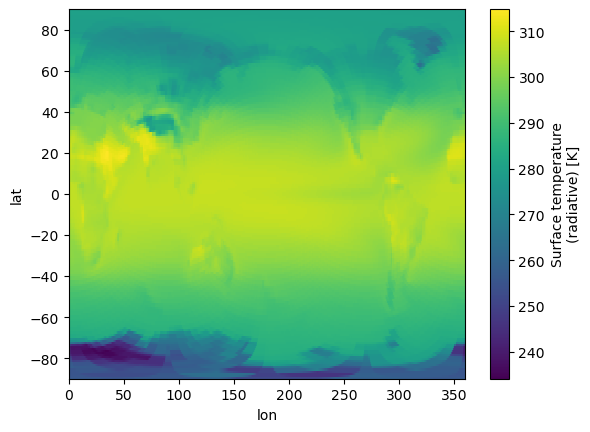

In [32]:
da_clim.plot()

In constrast, `x4c` generates publication-ready plots:

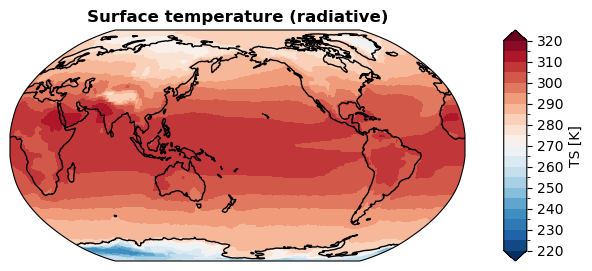

In [38]:
fig, ax = da_clim.x.plot(
    levels=np.linspace(220, 320, 21),
    cbar_kwargs={'ticks': np.linspace(220, 320, 11)},
)